# Section 1: k-means and DBSCAN

    

In [1]:
# import necessary modules

import numpy as np
import pandas as pd
import csv
from matplotlib import pyplot as plt

## Section 1.1: read and explore the data set data1.csv

In [2]:
# Question 1: read data from the target CSV file 'data1.csv', store the file contents in variable 'data' which is Pandas.DataFrame,
# show the first 10 rows of variable 'data' and take a look at the structure of data in variable 'data' ??????

# read data from 'data1.csv' and store the data in variable 'data'
data = pd.read_csv('data1.csv')
# show first ten rows in 'data'
data.head(10)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729
5,24.169930,32.024780
6,21.665780,4.892855
7,4.693684,12.342170
8,19.211910,-1.121366
9,4.230391,-4.441536


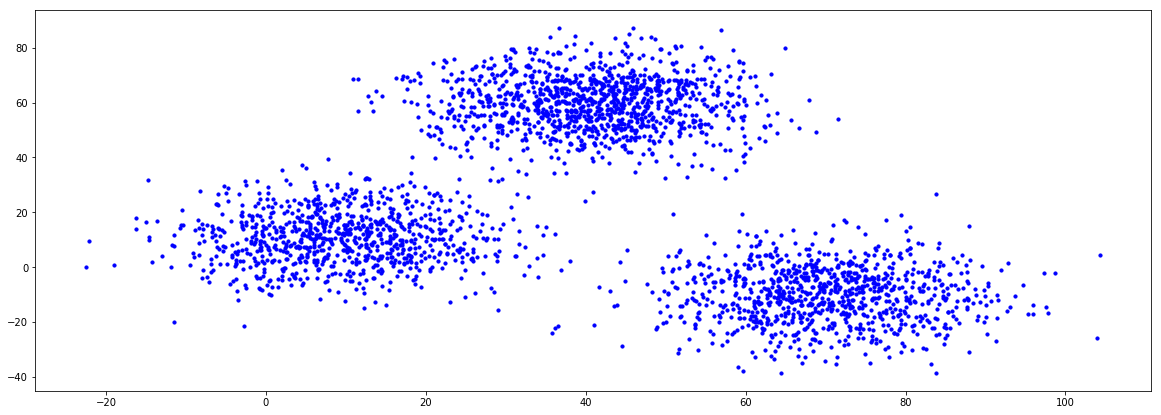

In [3]:
# Question 2: make a variable 'v1_values' which is an array of values from column 'V1' in variable 'data' ??????
# Question 3: make a variable 'v2_values' which is an array of values from column 'V2' in variable 'data' ??????

v1_values = data['V1'].values
v2_values = data['V2'].values

plt.rcParams['figure.figsize'] = (20, 7)

# Question 4: draw scatter diagram for showing the distribution of data item in variable 'data'  by using variable 'v1_values' and 'v2_values'
# and find interesting features of the distribution of these data items ??????

plt.scatter(v1_values, v2_values, c='blue', s =10)

## Section 1.2: experiments on k-means and DBSCAN by using data1.csv

In [4]:
# import k-means module and DBSCAN module from sklearn

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
# create input data that is stored in variable 'data_set' for k-means and DBSCAN
# variable 'data_set' is an array where each row is corresponding to the row in variable 'data' 

data_set = np.array(list(zip(v1_values, v2_values)))

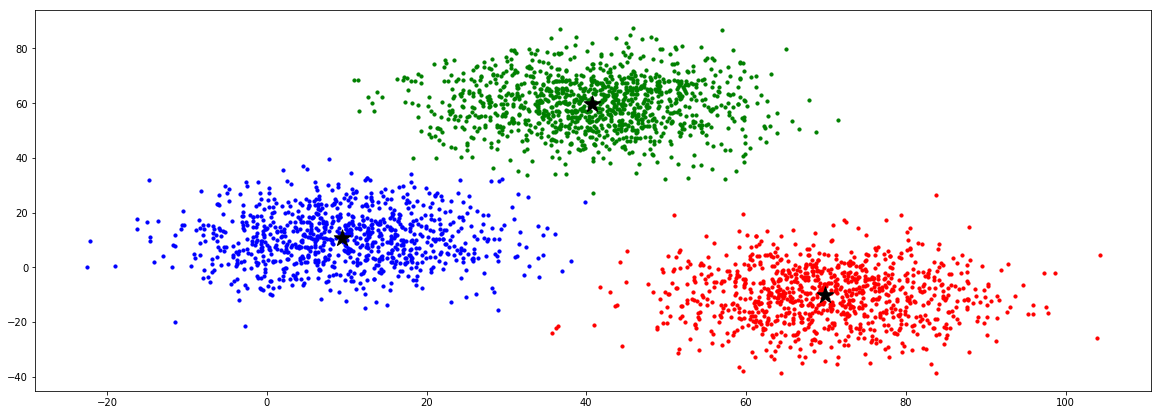

In [6]:
# Question 5: try values 3, 4 and 5 for the variable 'cluster_num' which represents the desired number of clusters
# and think deeply about which value for 'cluster_num' can help generate better clustering result and why ?? ???

cluster_num = 3

kmeans = KMeans(cluster_num).fit(data_set)
clusters = kmeans.labels_
centroids = kmeans.cluster_centers_

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm']
for cluster_index in range(cluster_num) :
    sub_set = np.array([data_set[i] for i in range(len(data_set)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])
plots.scatter(centroids[:,0], centroids[:,1], marker = '*', s = 300, c = 'k')

In [7]:
# Answer for question 5: the best clustering result can be got when variable 'cluster_num' is set to 3 because for the 
# values 4 and 5, k-means algorithm will produce some clusters which are very close to each other, this is because 
# the original data set natually has three potential clusters for the data objects in it. This also indicates one weakness
# of k-means which is that if not a suitable value for the variable 'cluster_num' is given then bad results might be got.

[-1, 0, 1, 2]


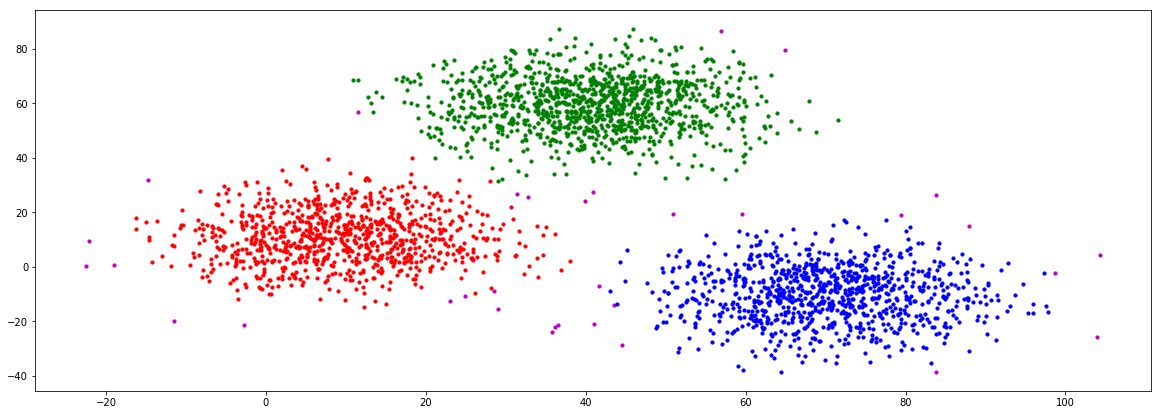

In [8]:
# Question 6: run DBSCAN on the 'data_set', compare the result to the result from k-means when 'cluster_num = 3'
# and think about which result is better and why ??????

dbscan = DBSCAN(eps = 6, min_samples= 10).fit(data_set)
clusters = dbscan.labels_
cluster_indexs = np.unique(clusters).tolist()
print(cluster_indexs)

fig, plots = plt.subplots()
colors = ['r', 'g', 'b', 'y', 'm']
for cluster_index in cluster_indexs :
    sub_set = np.array([data_set[i] for i in range(len(data_set)) if clusters[i] == cluster_index])
    if len(sub_set) == 0 :
        continue
    plots.scatter(sub_set[:,0], sub_set[:,1], s = 10, c = colors[cluster_index])


In [9]:
# Answer for question 6: the better clustering result belongs to DBSCAN, becaue this algorithm generates four clusters,
# one cluster is for the outliers. This comparison shows the weakness of k-means which is that this algorithm cannot
# deal with outliers in the input data set. It can be seen from the result of k-means, there are some data objects
# that locate between two clusters are put in one cluster of the three clusters discovered.

# Section 2: Apriori algorithm and association rule algorithm

In [10]:
# import Apriori module and TransactionEncoder moduler and association module from mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

## Section 2.1: learn to use Apriori algorithm and association rule algorithm from mlxtend 

In [11]:
# read data from file repair.csv and show first 10 rows of this file

data_set = []

with open("repair.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_set.append(row)

print(len(data_set))
data_set[0:3][:]

1104


[['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Complex)',
  'Repair (Complex)',
  'Test Repair',
  'Test Repair',
  'Inform User',
  'Archive Repair'],
 ['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Simple)',
  'Repair (Simple)',
  'Test Repair',
  'Test Repair',
  'Restart Repair',
  'Repair (Simple)',
  'Inform User',
  'Repair (Simple)',
  'Test Repair',
  'Test Repair',
  'Archive Repair'],
 ['Register',
  'Analyze Defect',
  'Analyze Defect',
  'Repair (Complex)',
  'Repair (Complex)',
  'Test Repair',
  'Test Repair',
  'Inform User',
  'Archive Repair']]

In [12]:
# learn to use TransactionEncoder module to convert an array to DataFrame for Apriori algorithm in mlxtend

te = TransactionEncoder()
te_ary = te.fit(data_set).transform(data_set)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(10)

,Analyze Defect,Archive Repair,Inform User,Register,Repair (Complex),Repair (Simple),Restart Repair,Test Repair
0,True,True,True,True,True,False,False,True
1,True,True,True,True,False,True,True,True
2,True,True,True,True,True,False,False,True
3,True,True,True,True,False,True,False,True
4,True,False,True,True,True,False,False,True
5,True,False,True,True,False,True,False,True
6,True,False,True,True,False,True,True,True
7,True,False,True,True,False,True,False,True
8,True,False,True,True,False,True,False,True
9,True,False,True,True,True,False,False,True


In [13]:
# learn to use Apriori algorithm from mlxtend

frequent_itemsets = apriori(data, min_support = 0.4, use_colnames = True)
frequent_itemsets

,support,itemsets
0,1.000000,(Analyze Defect)
1,0.905797,(Archive Repair)
2,0.998188,(Inform User)
3,1.000000,(Register)
4,0.596920,(Repair (Complex))
5,0.438406,(Repair (Simple))
6,0.998188,(Test Repair)
7,0.905797,"(Archive Repair, Analyze Defect)"
8,0.998188,"(Analyze Defect, Inform User)"
9,1.000000,"(Register, Analyze Defect)"


In [14]:
# learn to use association rule algorithm from mlxtend

rules_association =arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.7)
rules_association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Archive Repair),(Analyze Defect),0.905797,1.000000,0.905797,1.000000,1.000000,0.000000,inf
1,(Analyze Defect),(Archive Repair),1.000000,0.905797,0.905797,0.905797,1.000000,0.000000,1.000000
2,(Analyze Defect),(Inform User),1.000000,0.998188,0.998188,0.998188,1.000000,0.000000,1.000000
3,(Inform User),(Analyze Defect),0.998188,1.000000,0.998188,1.000000,1.000000,0.000000,inf
4,(Register),(Analyze Defect),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
5,(Analyze Defect),(Register),1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
6,(Repair (Complex)),(Analyze Defect),0.596920,1.000000,0.596920,1.000000,1.000000,0.000000,inf
7,(Repair (Simple)),(Analyze Defect),0.438406,1.000000,0.438406,1.000000,1.000000,0.000000,inf
8,(Test Repair),(Analyze Defect),0.998188,1.000000,0.998188,1.000000,1.000000,0.000000,inf
9,(Analyze Defect),(Test Repair),1.000000,0.998188,0.998188,0.998188,1.000000,0.000000,1.000000


## Section 2.2: exercises for filtering out qualified frequent itemsets and association rules   

In [15]:
# read file '2012.csv' and turn the data format for Apriori algorithm

data_set = []

with open("2012.csv") as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_set.append(row)

te = TransactionEncoder()
te_ary = te.fit(data_set).transform(data_set)
data = pd.DataFrame(te_ary, columns = te.columns_)
data.head(10)

,A_ACCEPTED,A_ACTIVATED,A_APPROVED,A_CANCELLED,A_DECLINED,A_FINALIZED,A_PARTLYSUBMITTED,A_PREACCEPTED,A_REGISTERED,A_SUBMITTED,...,O_SELECTED,O_SENT,O_SENT_BACK,W_Afhandelen leads,W_Beoordelen fraude,W_Completeren aanvraag,W_Nabellen incomplete dossiers,W_Nabellen offertes,W_Valideren aanvraag,W_Wijzigen contractgegevens
0,True,True,True,False,False,True,True,True,True,True,...,True,True,True,False,False,True,False,True,True,False
1,True,True,True,False,False,True,True,True,True,True,...,True,True,True,False,False,True,False,True,True,False
2,True,True,True,False,False,True,True,True,True,True,...,True,True,True,False,False,True,False,True,True,True
3,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,True,False,True,True,False,True,...,False,False,False,True,False,True,False,False,False,False
7,False,False,False,True,False,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
8,False,False,False,True,False,False,True,True,False,True,...,False,False,False,True,False,True,False,False,False,False
9,True,False,False,False,True,True,True,True,False,True,...,True,True,True,False,False,True,False,True,True,False


In [16]:
# Question 7: mine frequent itemsets from the transaction set 'data' 
# and store the found itemsets in variable 'frequent_itemsets', set minimum support to 0.2 ??????

frequent_itemsets = apriori(data, min_support = 0.2, use_colnames = True)

# Question 8: add another column named 'length' in 'frequent_itemsets' which indicates the number of items in each frequent itemset ??????

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Question 9: filter out the frequent itemsets which have a length longer than 5 and a support bigger than 0.3 
# and store these found itemsets in variable 'frequent_itemsets_filtered' ??????

frequent_itemsets_filtered = frequent_itemsets.loc[(frequent_itemsets['length'] > 5) & (frequent_itemsets['support'] > 0.3)]   
frequent_itemsets_filtered

,support,itemsets,length
2000,0.383205,"(A_PREACCEPTED, O_CREATED, A_ACCEPTED, A_PARTL...",6
2001,0.383205,"(A_PREACCEPTED, O_SELECTED, A_ACCEPTED, A_PART...",6
2002,0.383205,"(A_PREACCEPTED, O_SENT, A_ACCEPTED, A_PARTLYSU...",6
2004,0.383205,"(A_PREACCEPTED, W_Completeren aanvraag, A_ACCE...",6
2005,0.383205,"(A_PREACCEPTED, A_ACCEPTED, A_PARTLYSUBMITTED,...",6
2012,0.383205,"(A_PREACCEPTED, O_SELECTED, O_CREATED, A_ACCEP...",6
2013,0.383205,"(A_PREACCEPTED, O_CREATED, O_SENT, A_ACCEPTED,...",6
2015,0.383205,"(A_PREACCEPTED, W_Completeren aanvraag, O_CREA...",6
2016,0.383205,"(A_PREACCEPTED, O_CREATED, A_ACCEPTED, A_PARTL...",6
2018,0.383205,"(A_PREACCEPTED, O_SELECTED, O_SENT, A_ACCEPTED...",6


In [17]:
# Question 10: mine association rules from the discovered frequent itemsets stored in variable 'frequent_itemsets', set minimum confidence to 0.7
# store the discovered rules in variable 'rules_association' ??????

rules_association =arule(frequent_itemsets, metric = 'confidence', min_threshold = 0.5)

# Question 11: filter out the rules with lift larger than 1 and support larger than 0.4, store the discovered rules in variable 'filtered_rules' ??????

filtered_rules = rules_association.loc[(rules_association['lift'] > 1) & (rules_association['support'] > 0.4)]     

# show the columns 'antecedents', 'consequents', 'support', 'confidence' and 'lift' of variable 'filtered_rules' 
filtered_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
75,(W_Completeren aanvraag),(A_PREACCEPTED),0.562925,1.0,1.776435
76,(A_PREACCEPTED),(W_Completeren aanvraag),0.562925,1.0,1.776435
843,"(W_Completeren aanvraag, A_PARTLYSUBMITTED)",(A_PREACCEPTED),0.562925,1.0,1.776435
844,"(A_PREACCEPTED, A_PARTLYSUBMITTED)",(W_Completeren aanvraag),0.562925,1.0,1.776435
845,(W_Completeren aanvraag),"(A_PREACCEPTED, A_PARTLYSUBMITTED)",0.562925,1.0,1.776435
846,(A_PREACCEPTED),"(W_Completeren aanvraag, A_PARTLYSUBMITTED)",0.562925,1.0,1.776435
1032,"(W_Completeren aanvraag, A_SUBMITTED)",(A_PREACCEPTED),0.562925,1.0,1.776435
1033,"(A_PREACCEPTED, A_SUBMITTED)",(W_Completeren aanvraag),0.562925,1.0,1.776435
1034,(W_Completeren aanvraag),"(A_PREACCEPTED, A_SUBMITTED)",0.562925,1.0,1.776435
1035,(A_PREACCEPTED),"(W_Completeren aanvraag, A_SUBMITTED)",0.562925,1.0,1.776435


In [18]:
# Here I write the code for using python to calculate Euclidean distance between two objects of dimension two

((2.3343-3.2343)**2 + (3.2234-1.3434)**2)**0.5

2.084322431870847